In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import to_categorical
from keras import metrics

In [3]:
# global
filtered_cols = ['MEAN_RR', 'HR', 'SDRR', 'pNN50', 'LF', 'HF', 'condition']
input_shape = len(filtered_cols) - 1

In [4]:
# SWELL-Knowledge Worker Dataset
train_file = pd.read_csv('stress_train.csv').drop(columns="datasetId")

In [5]:
# relevant features
train_file = train_file[filtered_cols]
train_file

,MEAN_RR,HR,SDRR,pNN50,LF,HF,condition
0,885.157845,69.499952,140.972741,0.533333,1009.249419,15.522603,no stress
1,939.425371,64.363150,81.317742,0.000000,690.113275,2.108525,interruption
2,898.186047,67.450066,84.497236,0.200000,1298.222619,13.769729,interruption
3,881.757865,68.809562,90.370537,0.133333,1005.981659,18.181913,no stress
4,809.625331,74.565728,62.766242,0.200000,1421.782051,48.215822,no stress
...,...,...,...,...,...,...,...
369284,721.396910,83.384647,36.377559,0.000000,313.115284,38.227175,no stress
369285,984.266492,61.314243,74.918433,0.200000,717.285030,2.573834,no stress
369286,1025.499743,59.028594,95.309200,2.066667,2376.578392,4.287216,no stress
369287,798.123167,75.978628,78.449897,1.466667,1277.128490,46.636158,no stress


In [6]:
train_file.describe()

,MEAN_RR,HR,SDRR,pNN50,LF,HF
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000
mean,846.650104,73.941824,109.352531,0.866001,946.530252,39.245603
std,124.603984,10.337453,77.117025,0.990189,574.171780,45.398869
min,547.492221,48.737243,27.233947,0.000000,90.048557,0.061783
25%,760.228533,66.715776,64.205641,0.000000,545.449386,10.720312
50%,822.951438,74.217809,82.608243,0.466667,782.716291,24.841938
75%,924.117422,80.334937,118.237002,1.466667,1201.432256,45.272368
max,1322.016957,113.752309,563.486949,5.466667,3291.548112,364.486936


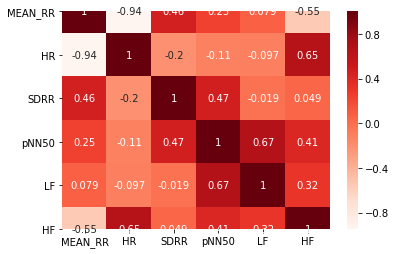

In [7]:
plt.figure()
cor = train_file.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
cor_target = abs(cor["HF"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

MEAN_RR    0.550557
HR         0.647427
HF         1.000000
Name: HF, dtype: float64

In [9]:
test_file = pd.read_csv('stress_test.csv').drop(columns="datasetId")
test_file = test_file[filtered_cols]
test_file.describe()

,MEAN_RR,HR,SDRR,pNN50,LF,HF
count,41033.000000,41033.000000,41033.000000,41033.000000,41033.000000,41033.000000
mean,846.856304,73.899319,108.856642,0.862545,948.851848,39.012113
std,124.422504,10.320644,76.602112,0.986774,577.413541,44.994281
min,547.483802,48.736986,27.338606,0.000000,92.663980,0.062809
25%,760.387193,66.633381,64.132798,0.000000,544.688588,10.551975
50%,822.611612,74.219199,82.710729,0.466667,783.452494,24.654848
75%,925.053520,80.292185,117.822094,1.400000,1210.276983,45.004948
max,1321.597359,113.754253,563.092252,5.400000,3290.093757,360.877726


In [10]:
# train
train_samples = train_file.drop(columns='condition').to_numpy()
train_labels = train_file['condition'].to_numpy()

# test
test_samples = test_file.drop(columns='condition').to_numpy()
test_labels = test_file['condition'].to_numpy()

In [11]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
train_samples = scaler.fit_transform(train_samples)
test_samples = scaler.fit_transform(test_samples)

# one-hot-encode labels
one_hot_encoder = OneHotEncoder(categories='auto')
train_labels = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1)).toarray()
test_labels = one_hot_encoder.fit_transform(test_labels.reshape(-1, 1)).toarray()

In [12]:
# build the model
model = Sequential([
    Dense(input_shape, input_shape=[input_shape], activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [13]:
model.compile(Adam(lr=.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_samples, train_labels, validation_split=0.1, batch_size=100, epochs=150, shuffle=True, verbose=2)


Train on 332360 samples, validate on 36929 samples
Epoch 1/150
 - 7s - loss: 0.8315 - accuracy: 0.6213 - val_loss: 0.7430 - val_accuracy: 0.6637
Epoch 2/150
 - 7s - loss: 0.6948 - accuracy: 0.6918 - val_loss: 0.6685 - val_accuracy: 0.6999
Epoch 3/150
 - 7s - loss: 0.6317 - accuracy: 0.7228 - val_loss: 0.6036 - val_accuracy: 0.7387
Epoch 4/150
 - 5s - loss: 0.5718 - accuracy: 0.7518 - val_loss: 0.5469 - val_accuracy: 0.7686
Epoch 5/150
 - 6s - loss: 0.5223 - accuracy: 0.7796 - val_loss: 0.5153 - val_accuracy: 0.7827
Epoch 6/150
 - 5s - loss: 0.4856 - accuracy: 0.7961 - val_loss: 0.4671 - val_accuracy: 0.8046
Epoch 7/150
 - 6s - loss: 0.4545 - accuracy: 0.8067 - val_loss: 0.4445 - val_accuracy: 0.8097
Epoch 8/150
 - 6s - loss: 0.4283 - accuracy: 0.8154 - val_loss: 0.4194 - val_accuracy: 0.8200
Epoch 9/150
 - 6s - loss: 0.4057 - accuracy: 0.8253 - val_loss: 0.3964 - val_accuracy: 0.8320
Epoch 10/150
 - 5s - loss: 0.3881 - accuracy: 0.8346 - val_loss: 0.3851 - val_accuracy: 0.8350
Epoch 1

Epoch 85/150
 - 6s - loss: 0.1012 - accuracy: 0.9601 - val_loss: 0.0920 - val_accuracy: 0.9644
Epoch 86/150
 - 6s - loss: 0.1010 - accuracy: 0.9603 - val_loss: 0.0975 - val_accuracy: 0.9615
Epoch 87/150
 - 5s - loss: 0.0999 - accuracy: 0.9607 - val_loss: 0.1031 - val_accuracy: 0.9590
Epoch 88/150
 - 6s - loss: 0.0995 - accuracy: 0.9604 - val_loss: 0.0991 - val_accuracy: 0.9608
Epoch 89/150
 - 6s - loss: 0.0990 - accuracy: 0.9610 - val_loss: 0.0988 - val_accuracy: 0.9615
Epoch 90/150
 - 5s - loss: 0.0974 - accuracy: 0.9616 - val_loss: 0.1063 - val_accuracy: 0.9585
Epoch 91/150
 - 6s - loss: 0.0970 - accuracy: 0.9616 - val_loss: 0.0931 - val_accuracy: 0.9625
Epoch 92/150
 - 6s - loss: 0.0968 - accuracy: 0.9620 - val_loss: 0.0882 - val_accuracy: 0.9650
Epoch 93/150
 - 6s - loss: 0.0949 - accuracy: 0.9628 - val_loss: 0.0893 - val_accuracy: 0.9629
Epoch 94/150
 - 6s - loss: 0.0952 - accuracy: 0.9625 - val_loss: 0.0886 - val_accuracy: 0.9660
Epoch 95/150
 - 6s - loss: 0.0931 - accuracy: 0.96

In [15]:
model.save('model_stress.h5')

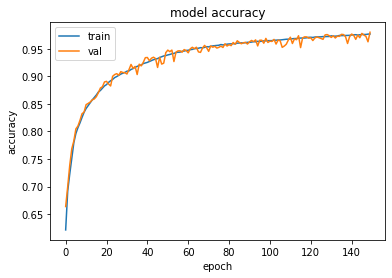

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

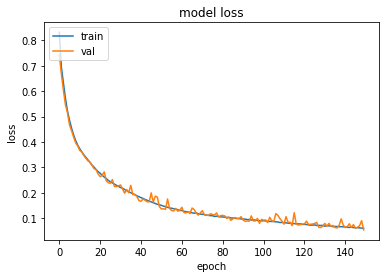

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()